<a href="https://colab.research.google.com/github/utkarshalok/Deep-Learning/blob/master/Digit_Recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

In [0]:
# Next, install the Kaggle API client.
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [0]:

!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.


In [0]:
# List available datasets.
!kaggle datasets list

In [0]:
!kaggle competitions download -c digit-recognizer

 93% 68.0M/73.2M [00:00<00:00, 57.6MB/s]
100% 73.2M/73.2M [00:00<00:00, 88.4MB/s]
 66% 32.0M/48.8M [00:00<00:00, 65.4MB/s]
100% 48.8M/48.8M [00:00<00:00, 123MB/s] 
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 74.3MB/s]


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense ,Dropout,Conv2D,MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


Using TensorFlow backend.


In [0]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [0]:
Y_train=train['label']
X_train=train.drop(labels=['label'],axis=1)
Y_train.value_counts()
X_train = X_train / 255.0
test = test / 255.0

In [0]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)

In [0]:
X_train,X_val,Y_train,Y_val= train_test_split(X_train,Y_train,test_size=0.1,random_state=2)

In [0]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25)) 

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
          

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
optimizer=RMSprop(lr=0.001,rho=0.9,epsilon=1e-08,decay=0.0)
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

In [40]:
x=model.fit(X_train,Y_train,batch_size=10,epochs=2,validation_data=(X_val,Y_val),verbose=2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/2
 - 299s - loss: 0.0954 - acc: 0.9780 - val_loss: 0.1108 - val_acc: 0.9795
Epoch 2/2
 - 301s - loss: 0.1229 - acc: 0.9738 - val_loss: 0.0800 - val_acc: 0.9802


In [0]:
Y_pred=model.predict(X_val)
Y_pred_classes=np.argmax(Y_pred,axis=1)
Y_true=np.argmax(Y_val,axis=1)

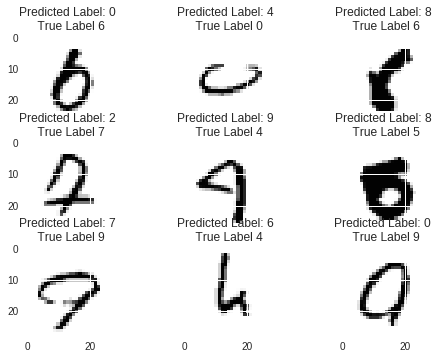

In [37]:
def display_errors(error_index,img_errors,pred_errors,obs_errors):
  n=0
  nrows=3
  ncols=3
  fig,ax= plt.subplots(nrows,ncols,sharex=True,sharey=True)
  for row in range(nrows):
    for col in range(ncols):
      error=error_index[n]
      ax[row,col].imshow(img_errors[error].reshape(28,28))
      ax[row,col].set_title("Predicted Label: {} \n True Label {}".format(pred_errors[error],obs_errors[error]))
      n+=1
  
errors=(Y_pred_classes-Y_true != 0)
Y_pred_classes_errors=Y_pred_classes[errors]
Y_pred_errors=Y_pred[errors]
Y_true_errors=Y_true[errors]
X_val_errors=X_val[errors]

Y_pred_errors_prob=np.max(Y_pred_errors)

true_errors_prob=np.diagonal(np.take(Y_pred_errors,Y_true_errors,axis=1))

delta_pred_true_errors=Y_pred_errors_prob-true_errors_prob
sorted_delta_errors=np.argsort(delta_pred_true_errors)
most_important_errors=sorted_delta_errors[-9:]
display_errors(most_important_errors,X_val_errors,Y_pred_classes_errors,Y_true_errors)